In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the provided CSV files
grid_search_results = pd.read_csv('dataset/0908_0_1_00_xgboost_evaluation_CV_GridSearch_IDO.csv')
random_search_results = pd.read_csv('dataset/0908_0_2_00_xgboost_evaluation_CV_RandomSearch_IDO.csv')


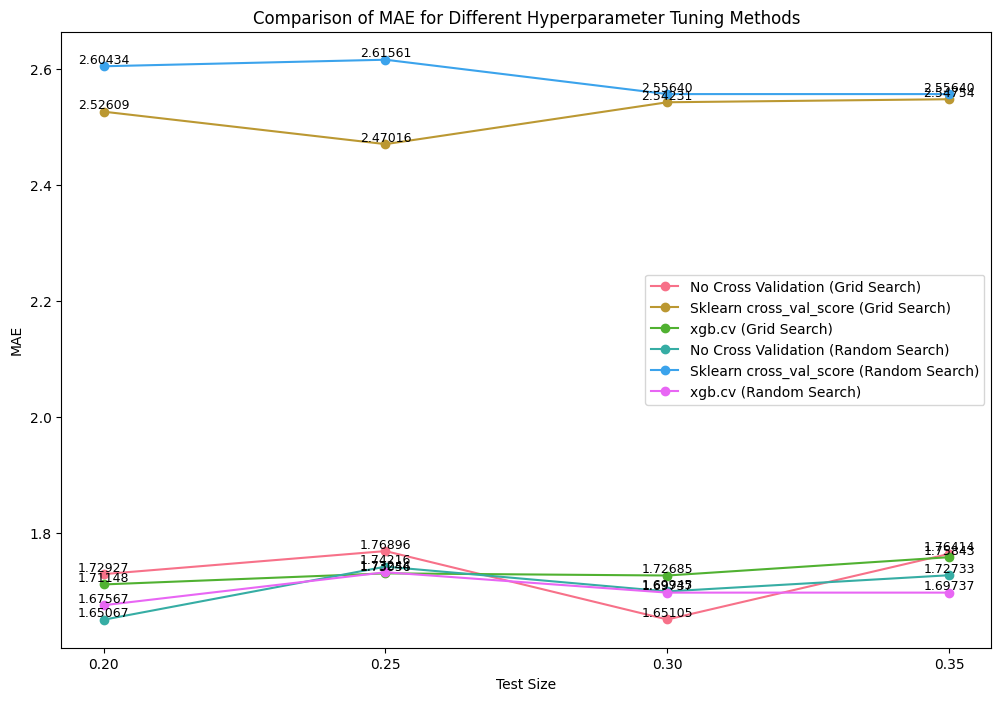

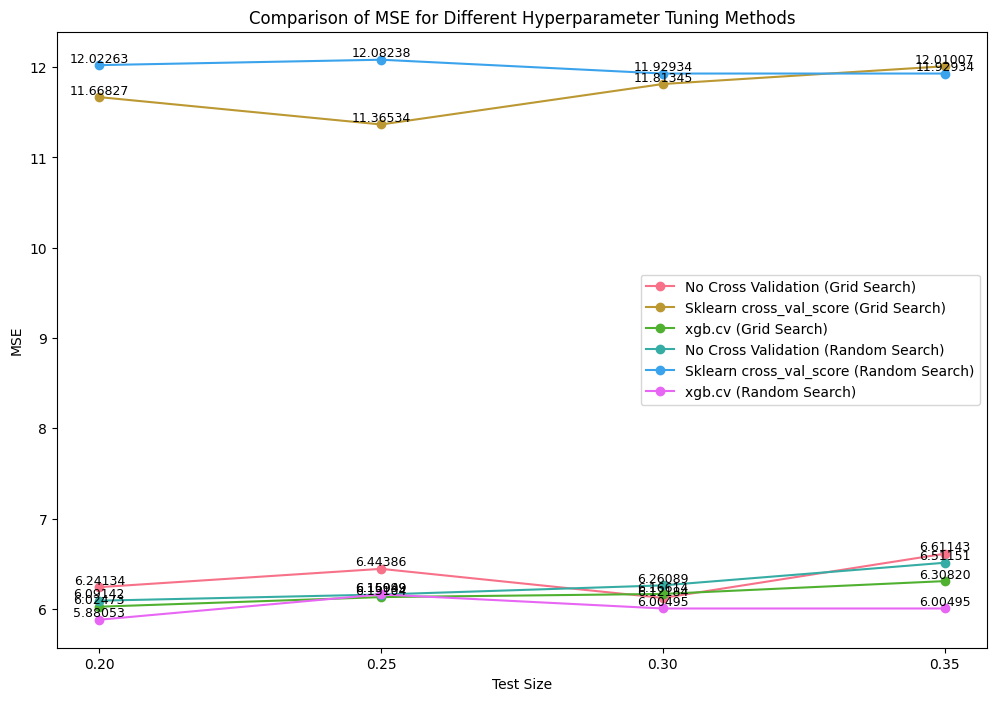

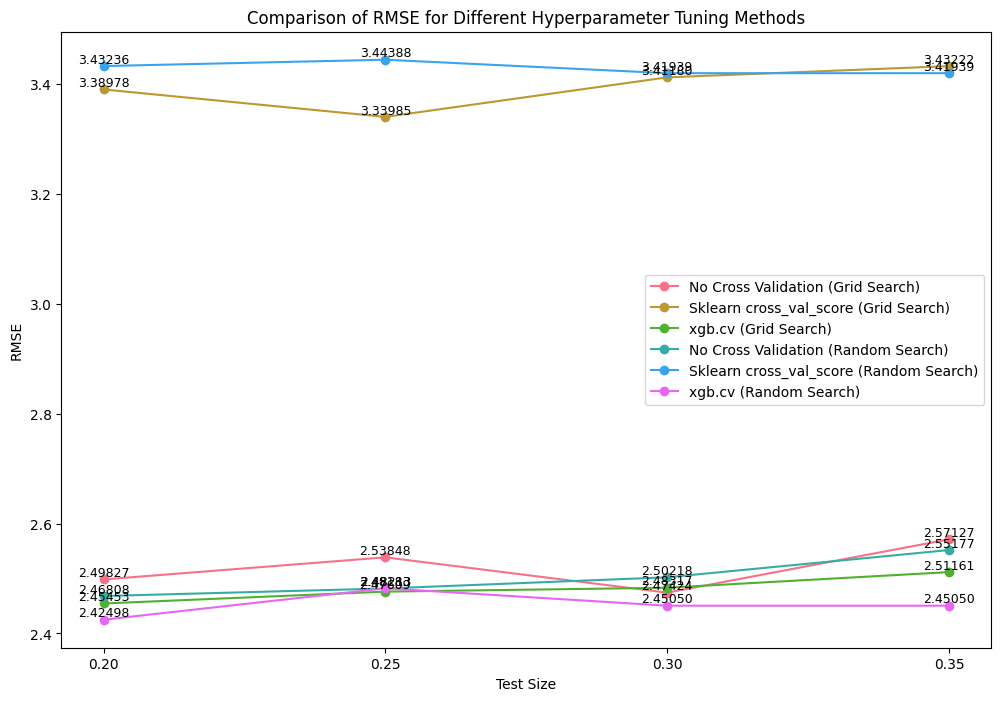

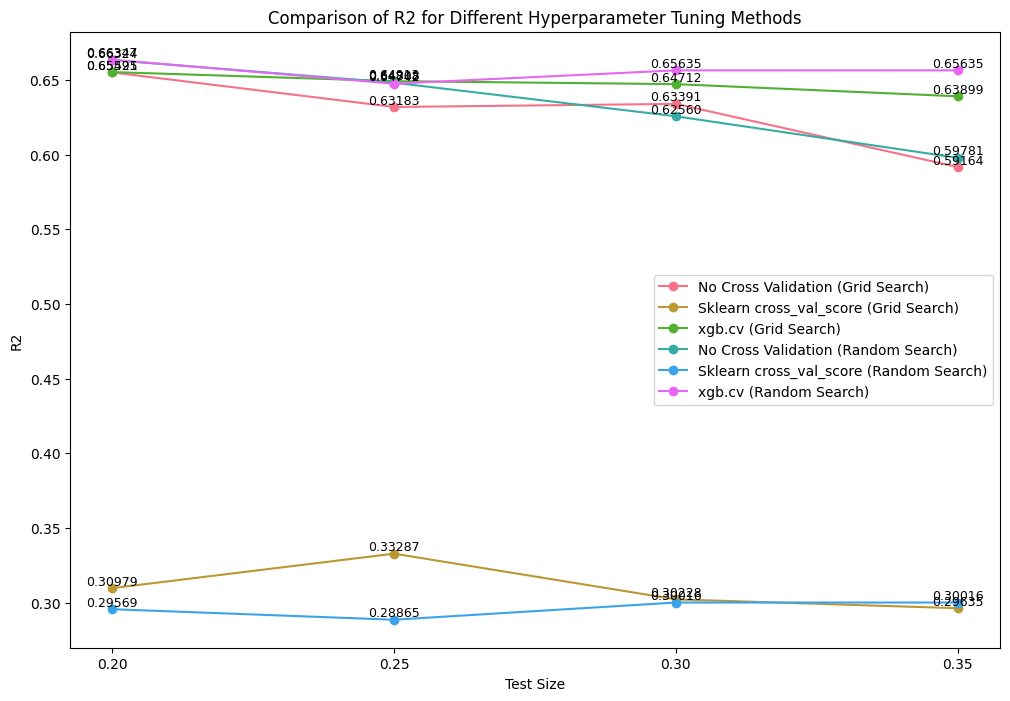

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23980\789111683.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_params_df['Best Params'] = best_params_df['Best Params'].apply(eval)


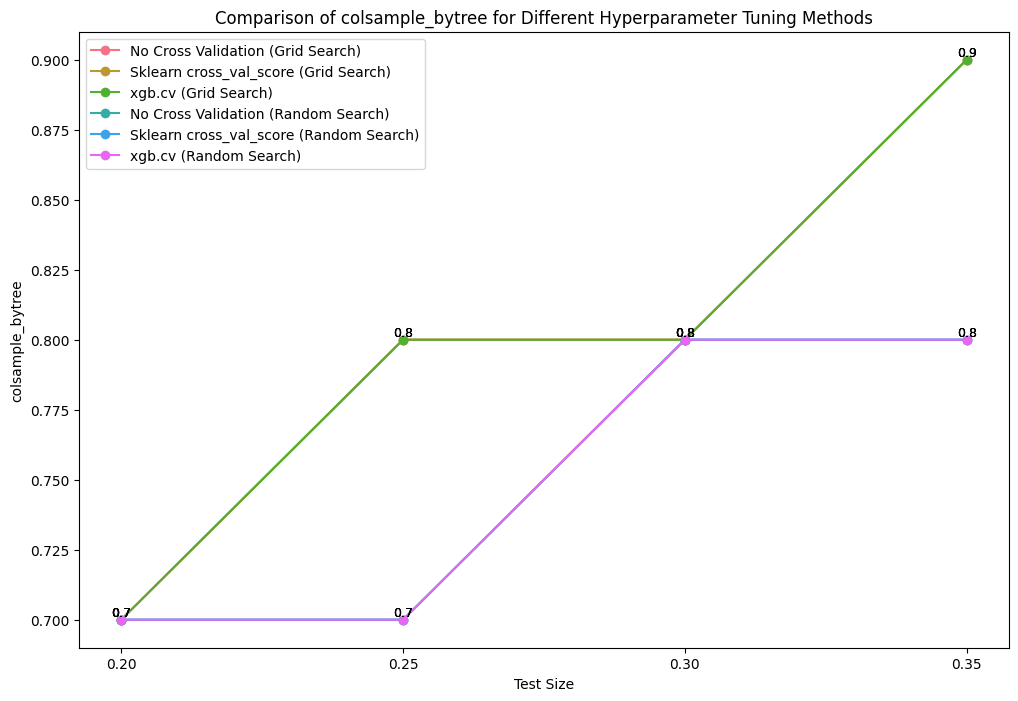

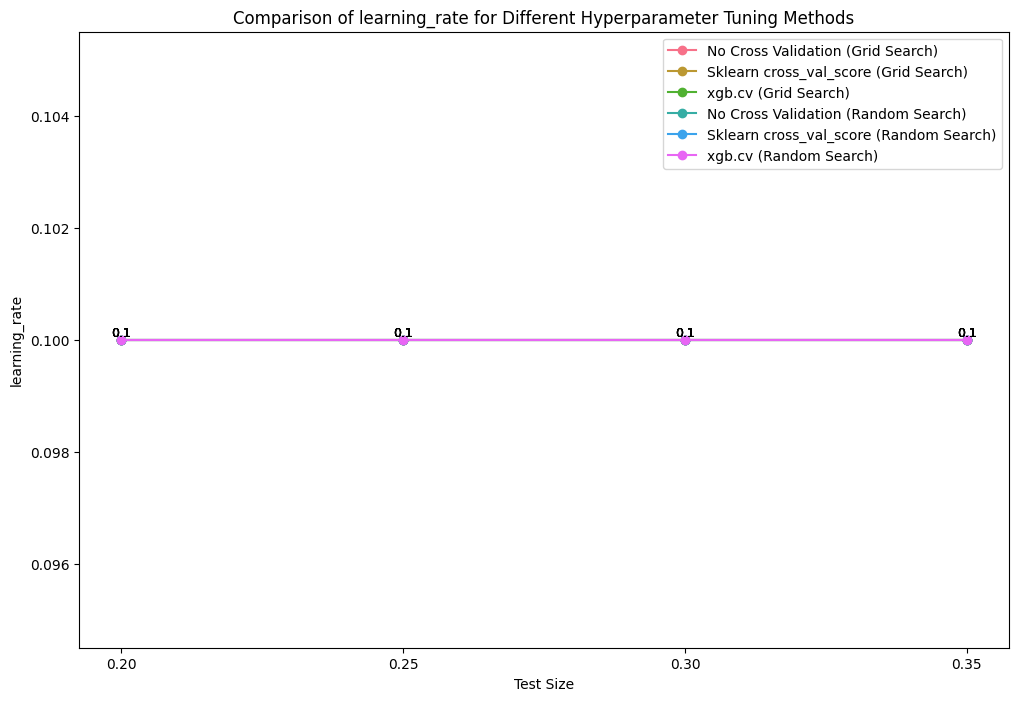

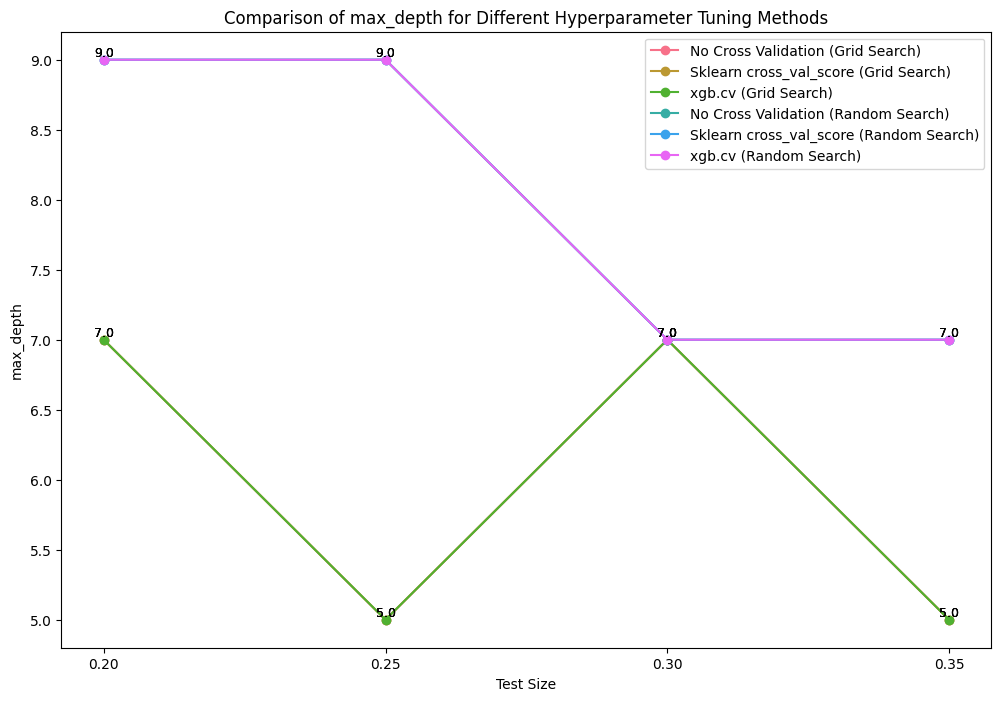

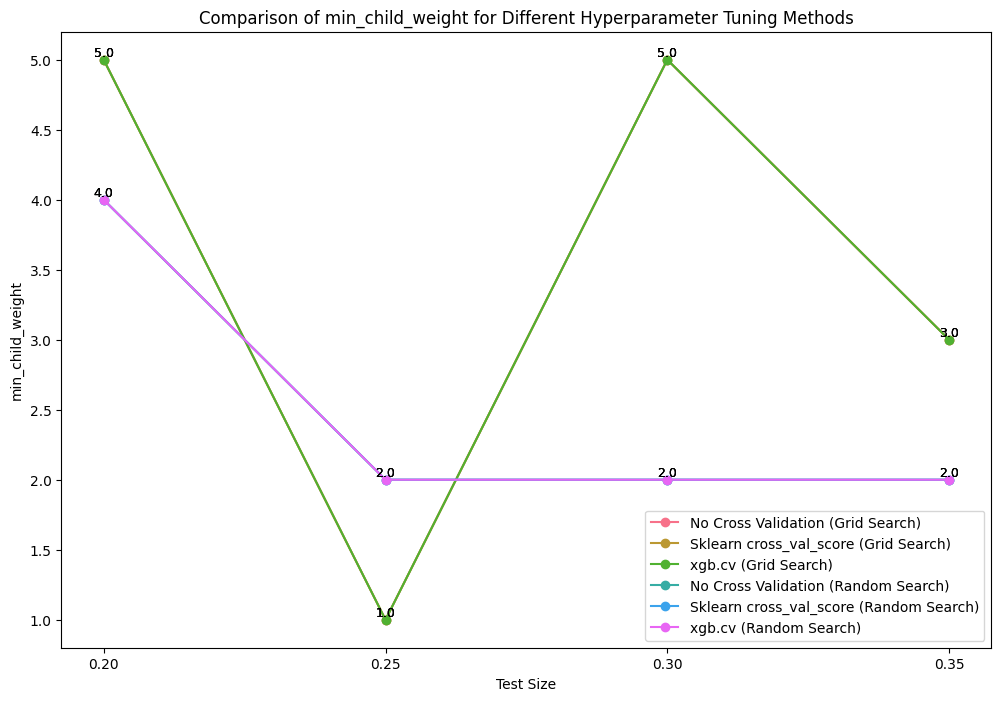

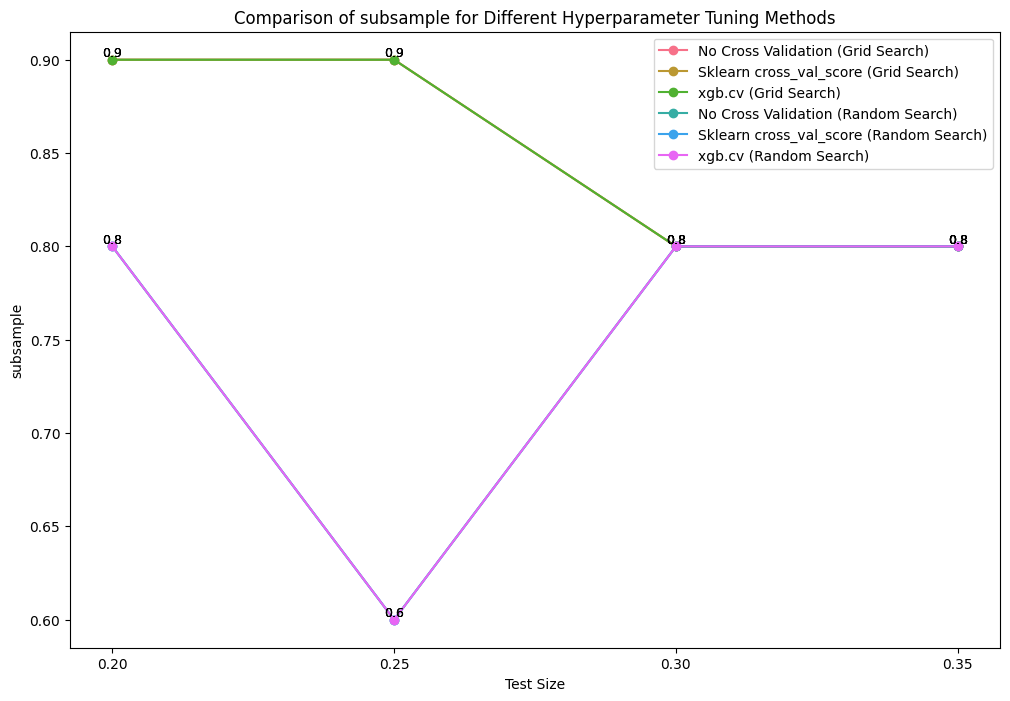

In [3]:

# Combine the results into a single DataFrame
combined_results = pd.concat([grid_search_results, random_search_results], ignore_index=True)

# Display the DataFrame
# import ace_tools as tools; tools.display_dataframe_to_user(name="Combined Hyperparameter Tuning Results", dataframe=combined_results)

# Visualization of performance metrics
metrics = ['MAE', 'MSE', 'RMSE', 'R2']
methods = combined_results['Method'].unique()
colors = sns.color_palette('husl', len(methods))

for metric in metrics:
    plt.figure(figsize=(12, 8))
    for i, method in enumerate(methods):
        subset = combined_results[combined_results['Method'] == method]
        plt.plot(subset['Test Size'], subset[metric], marker='o', label=method, color=colors[i])
        
        for x, y in zip(subset['Test Size'], subset[metric]):
            plt.text(x, y, f'{y:.5f}', ha='center', va='bottom', fontsize=9)

    plt.xlabel('Test Size')
    plt.ylabel(metric)
    plt.title(f'Comparison of {metric} for Different Hyperparameter Tuning Methods')
    plt.xticks(subset['Test Size'].unique())
    plt.legend()
    plt.show()

# Visualizing Best Parameters
best_params_df = combined_results[['Test Size', 'Method', 'Best Params']]

# Convert Best Params from string to dictionary for better visualization
best_params_df['Best Params'] = best_params_df['Best Params'].apply(eval)

# Extract unique parameters
param_keys = set()
for params in best_params_df['Best Params']:
    param_keys.update(params.keys())

param_keys = sorted(param_keys)

# Create a DataFrame for best parameters
best_params_expanded = best_params_df['Best Params'].apply(pd.Series)
best_params_expanded['Test Size'] = best_params_df['Test Size']
best_params_expanded['Method'] = best_params_df['Method']

# Plotting best parameters
for param in param_keys:
    plt.figure(figsize=(12, 8))
    for i, method in enumerate(methods):
        subset = best_params_expanded[best_params_expanded['Method'] == method]
        plt.plot(subset['Test Size'], subset[param], marker='o', label=method, color=colors[i])
        
        for x, y in zip(subset['Test Size'], subset[param]):
            plt.text(x, y, f'{y}', ha='center', va='bottom', fontsize=9)

    plt.xlabel('Test Size')
    plt.ylabel(param)
    plt.title(f'Comparison of {param} for Different Hyperparameter Tuning Methods')
    plt.xticks(subset['Test Size'].unique())
    plt.legend()
    plt.show()


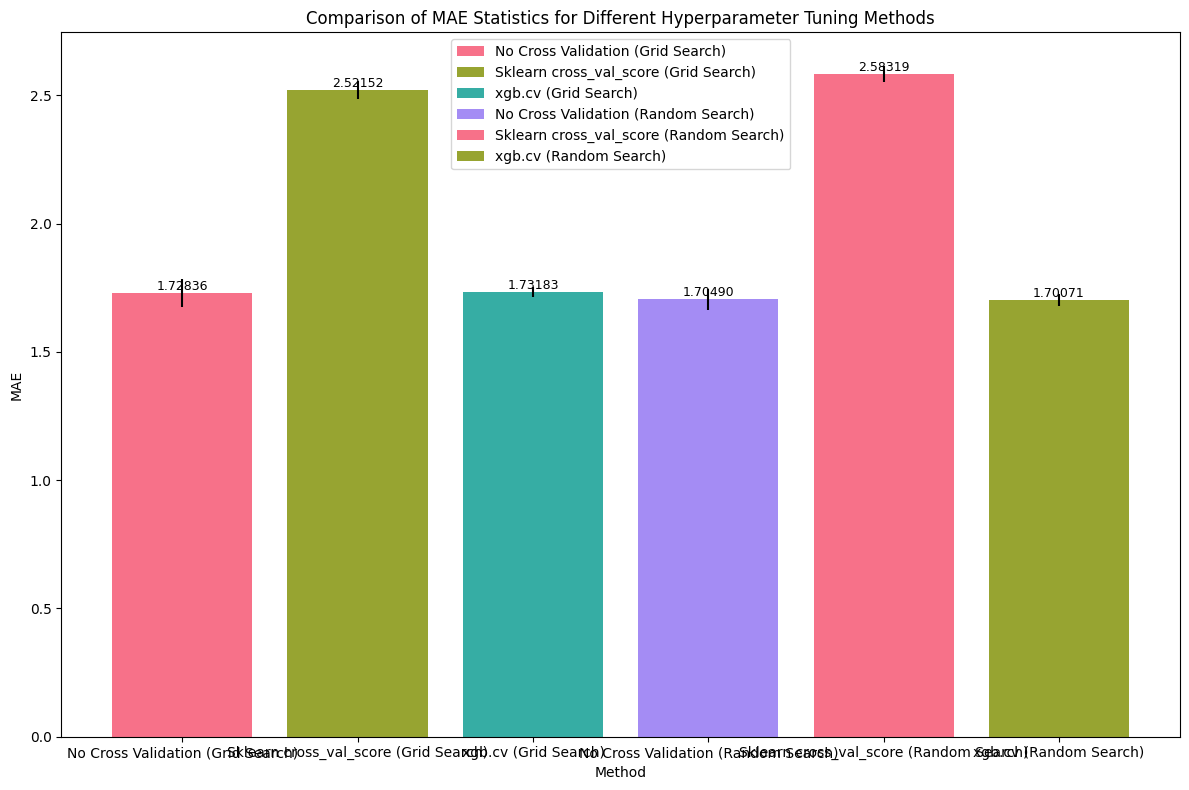

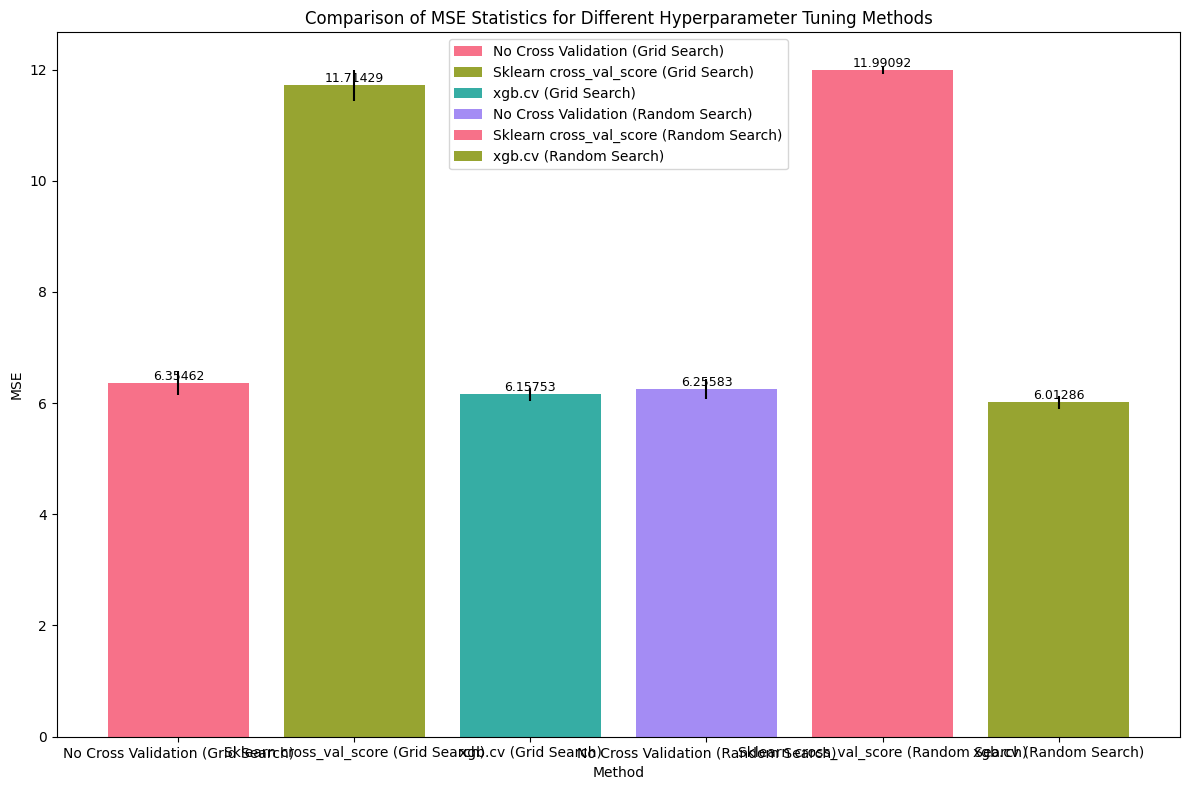

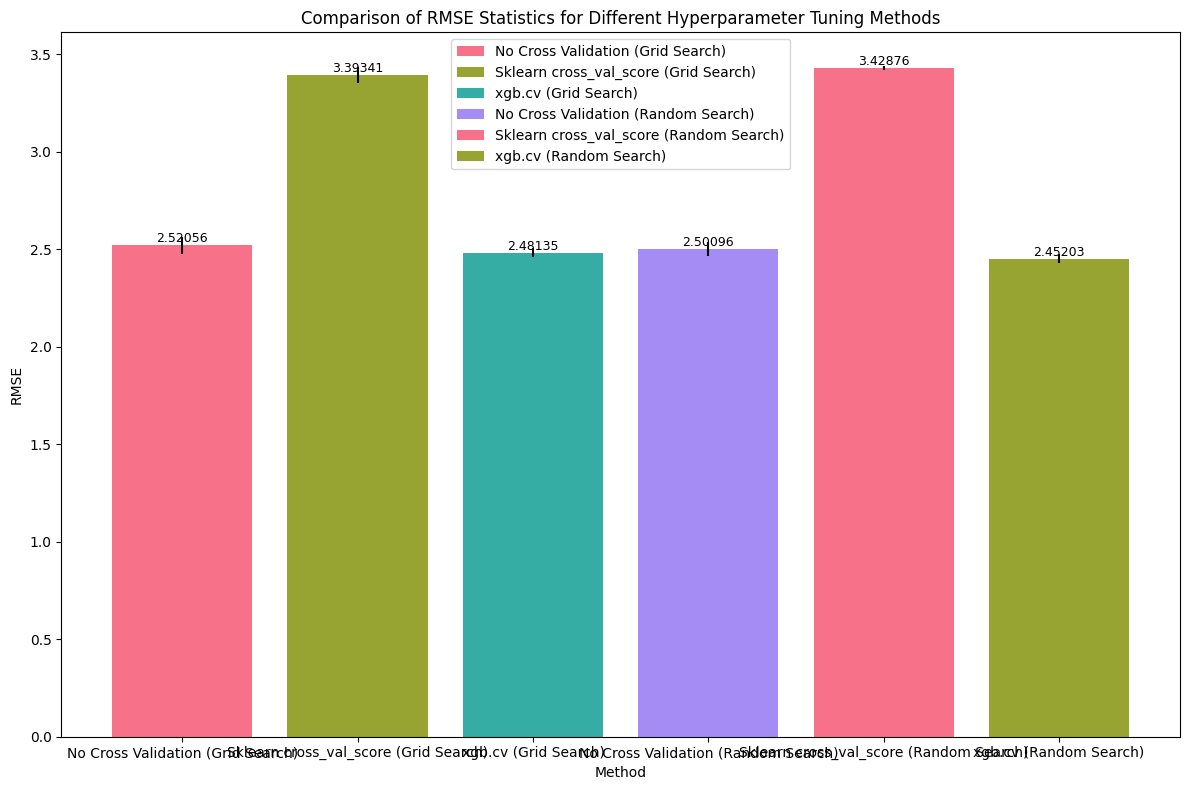

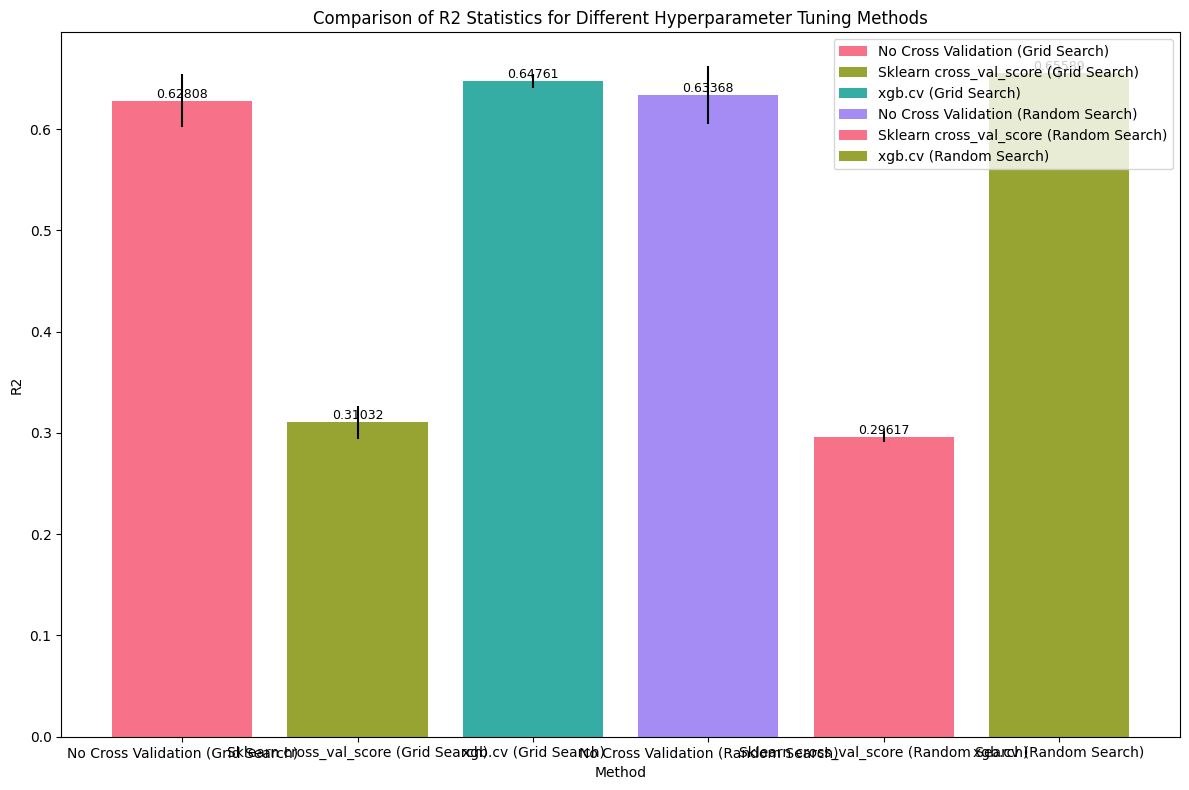

In [10]:
# Combine the results into a single DataFrame
combined_results = pd.concat([grid_search_results, random_search_results], ignore_index=True)

# Display the DataFrame
# import ace_tools as tools; tools.display_dataframe_to_user(name="Combined Hyperparameter Tuning Results", dataframe=combined_results)

# Compute statistics for performance metrics
metric_statistics = combined_results.groupby('Method')[['MAE', 'MSE', 'RMSE', 'R2']].agg(['mean', 'std']).reset_index()
metric_statistics.columns = [' '.join(col).strip() for col in metric_statistics.columns.values]

# Display the statistics DataFrame
# tools.display_dataframe_to_user(name="Metric Statistics", dataframe=metric_statistics)

# Visualizing statistics of performance metrics
metrics = ['MAE', 'MSE', 'RMSE', 'R2']
colors = sns.color_palette('husl', len(metrics))

for metric in metrics:
    plt.figure(figsize=(12, 8))
    for i, method in enumerate(combined_results['Method'].unique()):
        subset = metric_statistics[metric_statistics['Method'] == method]
        plt.bar(i, subset[f'{metric} mean'].values[0], yerr=subset[f'{metric} std'].values[0], label=method, color=colors[i % len(colors)])
        plt.text(i, subset[f'{metric} mean'].values[0], f'{subset[f"{metric} mean"].values[0]:.5f}', ha='center', va='bottom', fontsize=9)

    plt.xlabel('Method')
    plt.ylabel(metric)
    plt.title(f'Comparison of {metric} Statistics for Different Hyperparameter Tuning Methods')
    plt.xticks(range(len(combined_results['Method'].unique())), combined_results['Method'].unique())
    plt.tight_layout()
    plt.legend()
    plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23980\1177483917.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_params_df['Best Params'] = best_params_df['Best Params'].apply(eval)


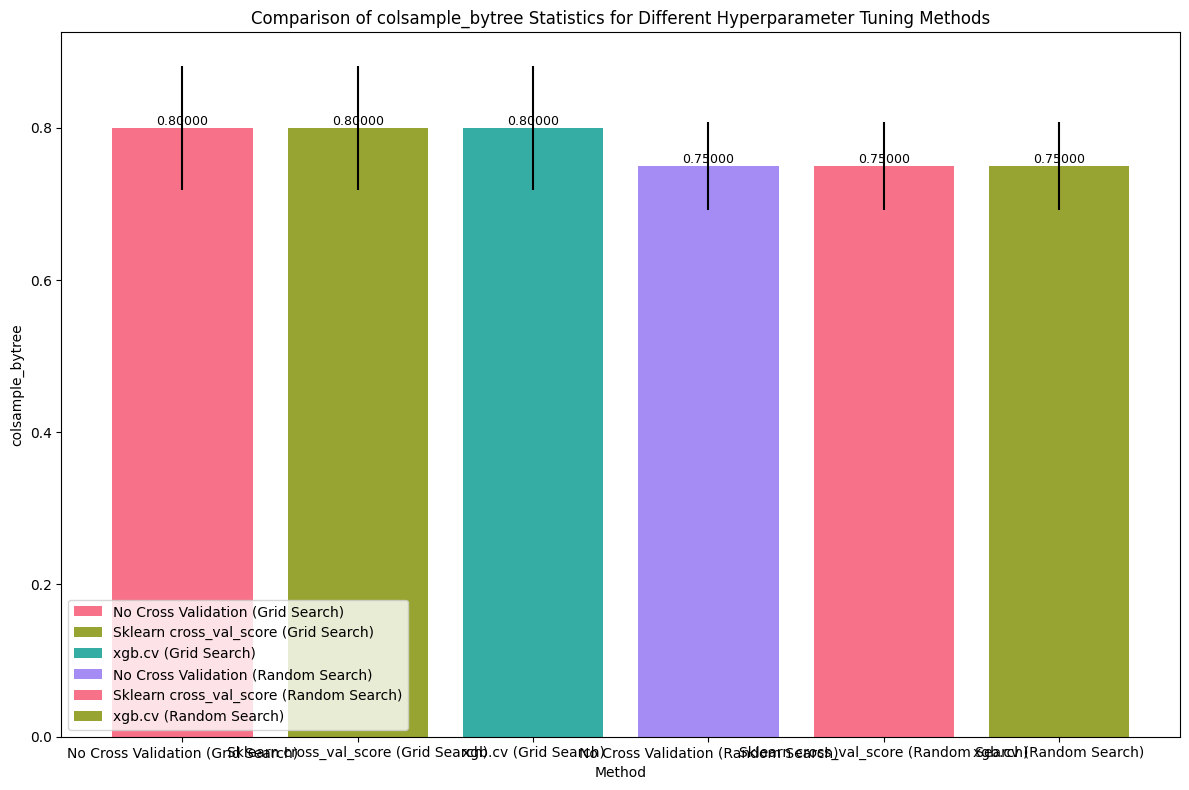

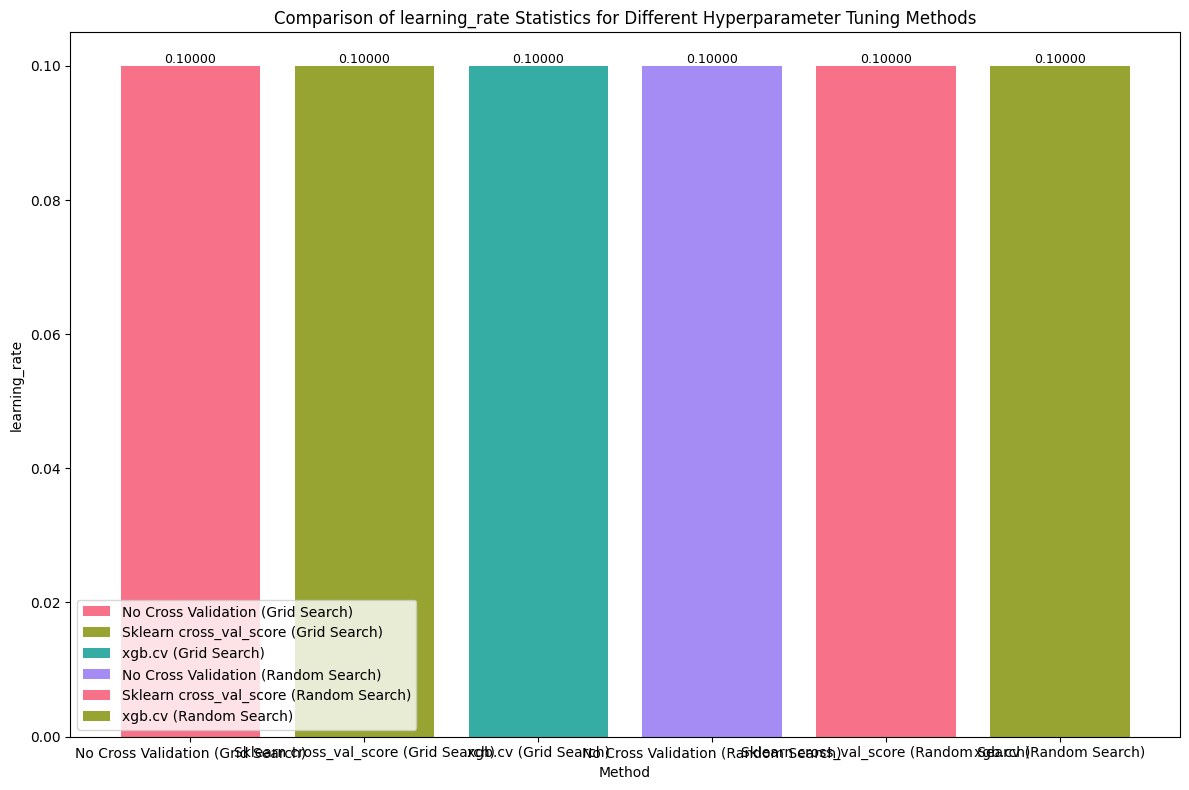

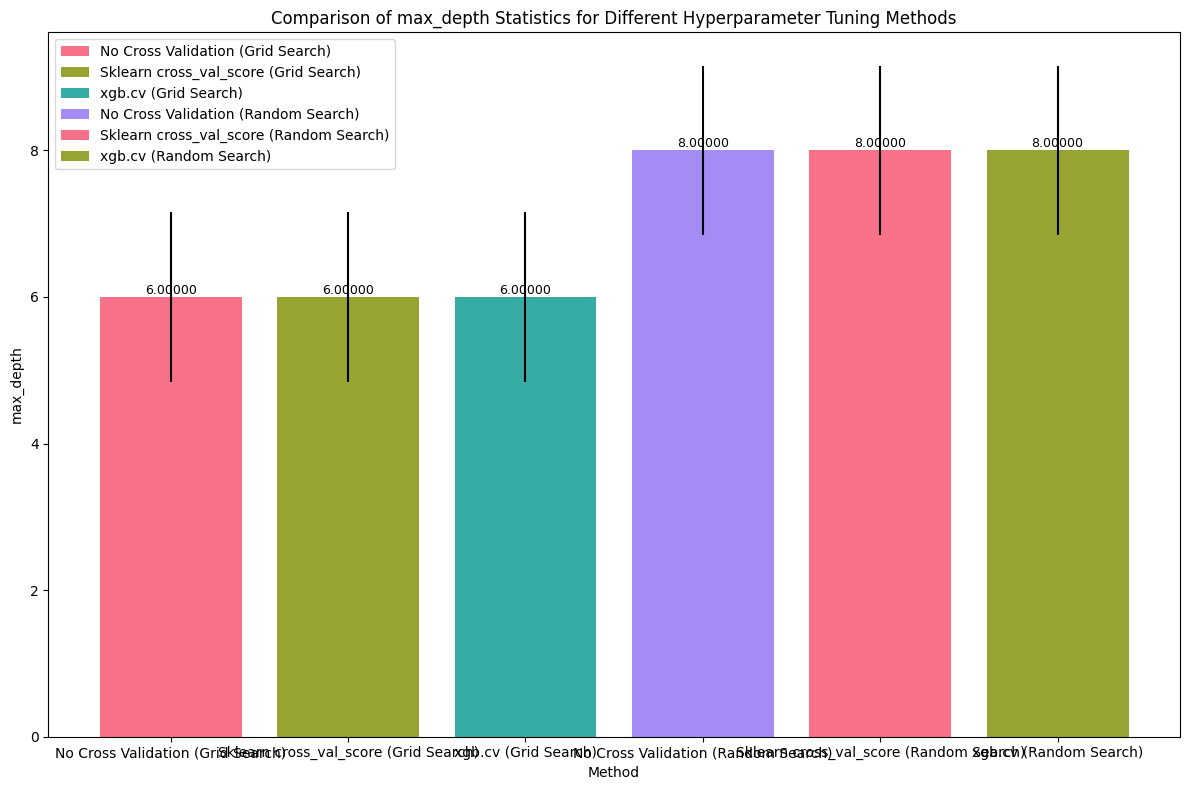

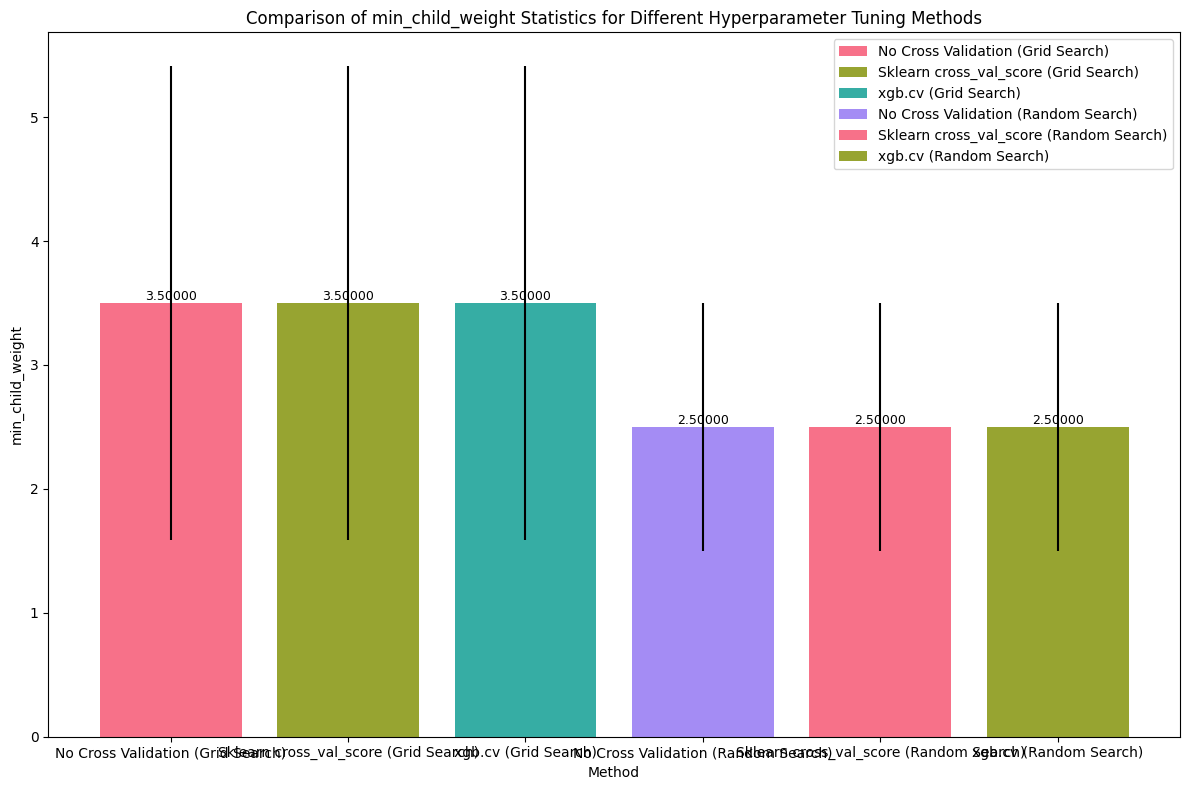

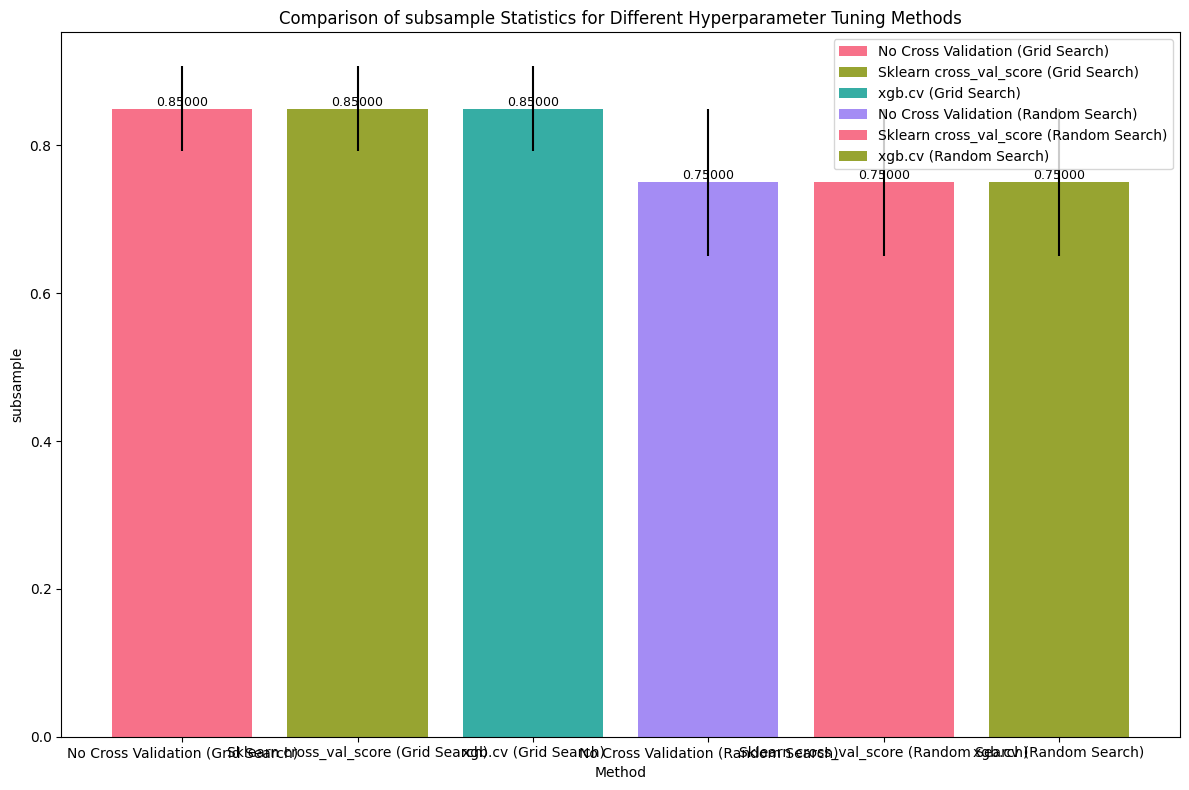

In [11]:

# Visualizing Best Parameters
best_params_df = combined_results[['Test Size', 'Method', 'Best Params']]

# Convert Best Params from string to dictionary for better visualization
best_params_df['Best Params'] = best_params_df['Best Params'].apply(eval)

# Extract unique parameters
param_keys = set()
for params in best_params_df['Best Params']:
    param_keys.update(params.keys())

param_keys = sorted(param_keys)

# Create a DataFrame for best parameters
best_params_expanded = best_params_df['Best Params'].apply(pd.Series)
best_params_expanded['Test Size'] = best_params_df['Test Size']
best_params_expanded['Method'] = best_params_df['Method']

# Compute statistics for best parameters
param_statistics = best_params_expanded.groupby('Method')[param_keys].agg(['mean', 'std']).reset_index()
param_statistics.columns = [' '.join(col).strip() for col in param_statistics.columns.values]

# Display the statistics DataFrame
# tools.display_dataframe_to_user(name="Parameter Statistics", dataframe=param_statistics)

# Plotting best parameters
for param in param_keys:
    plt.figure(figsize=(12, 8))
    for i, method in enumerate(combined_results['Method'].unique()):
        subset = param_statistics[param_statistics['Method'] == method]
        plt.bar(i, subset[f'{param} mean'].values[0], yerr=subset[f'{param} std'].values[0], label=method, color=colors[i % len(colors)])
        plt.text(i, subset[f'{param} mean'].values[0], f'{subset[f"{param} mean"].values[0]:.5f}', ha='center', va='bottom', fontsize=9)

    plt.xlabel('Method')
    plt.ylabel(param)
    plt.title(f'Comparison of {param} Statistics for Different Hyperparameter Tuning Methods')
    plt.xticks(range(len(combined_results['Method'].unique())), combined_results['Method'].unique())
    plt.tight_layout()
    plt.legend()
    plt.show()

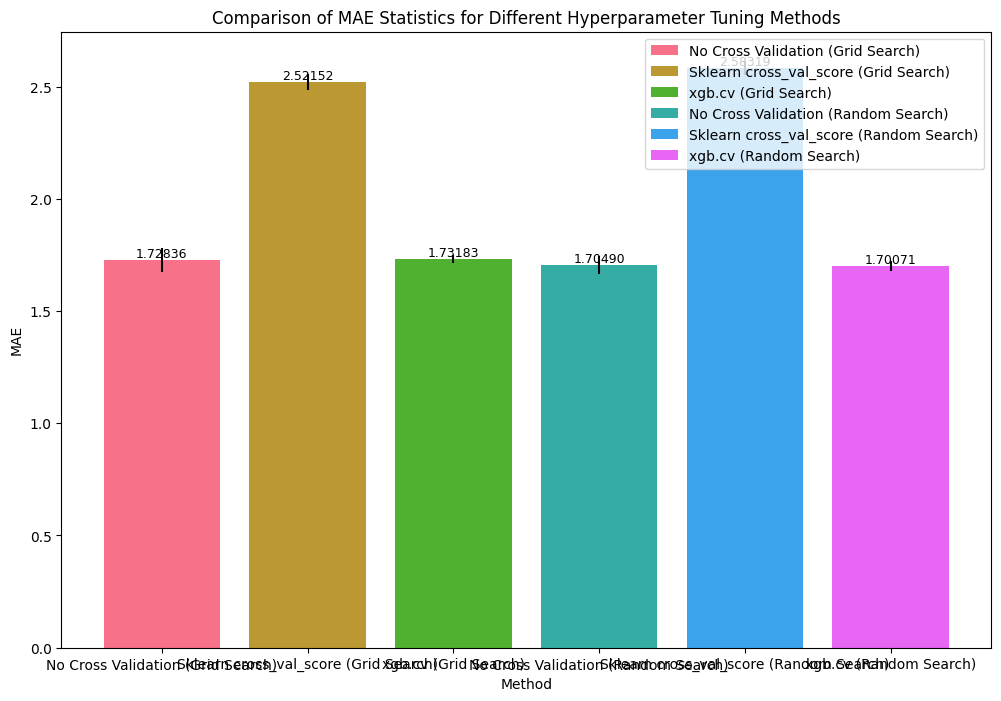

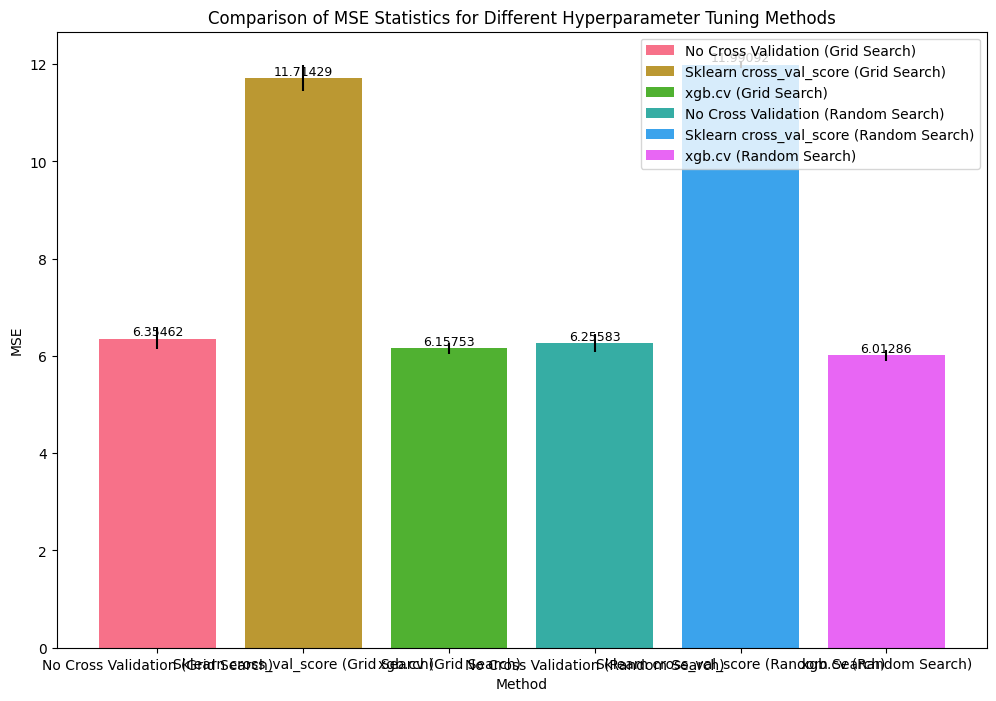

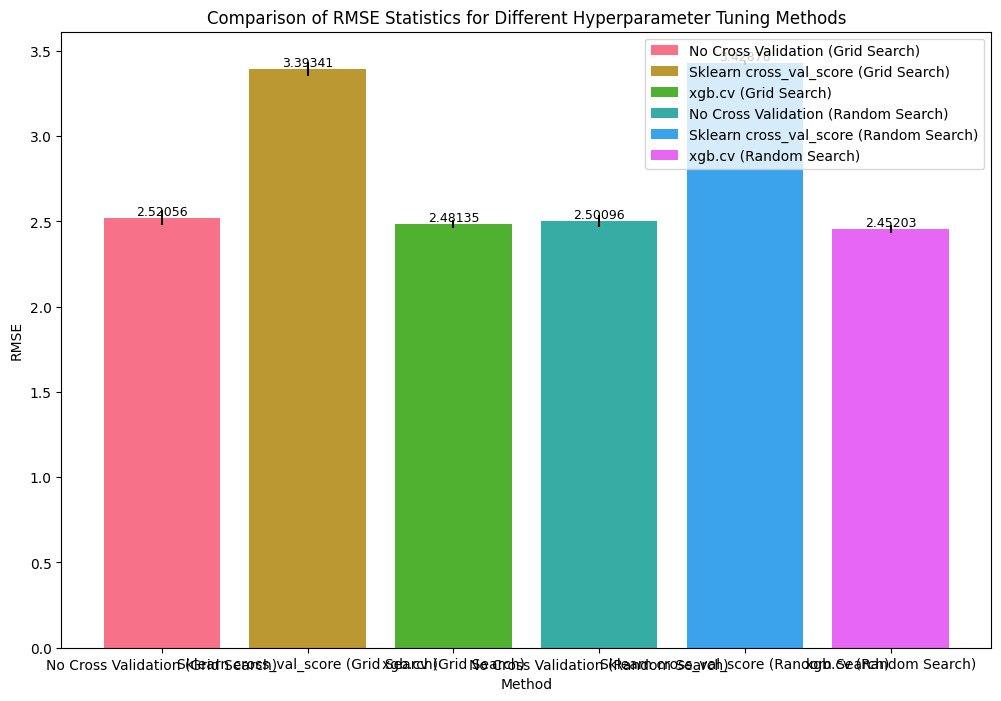

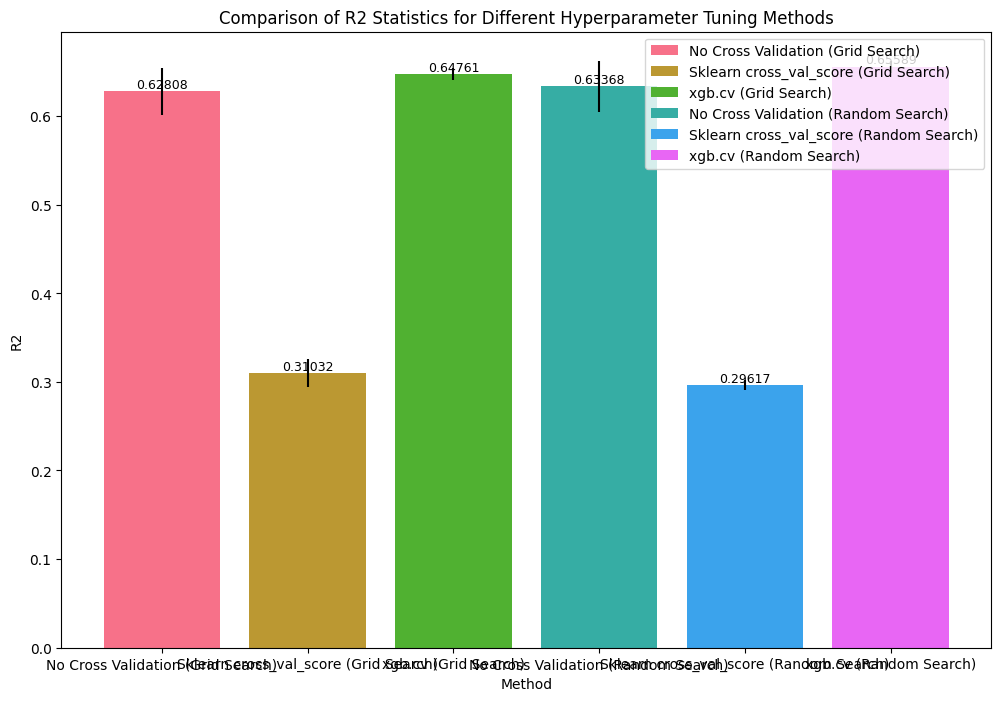

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23980\593056601.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_params_df['Best Params'] = best_params_df['Best Params'].apply(eval)


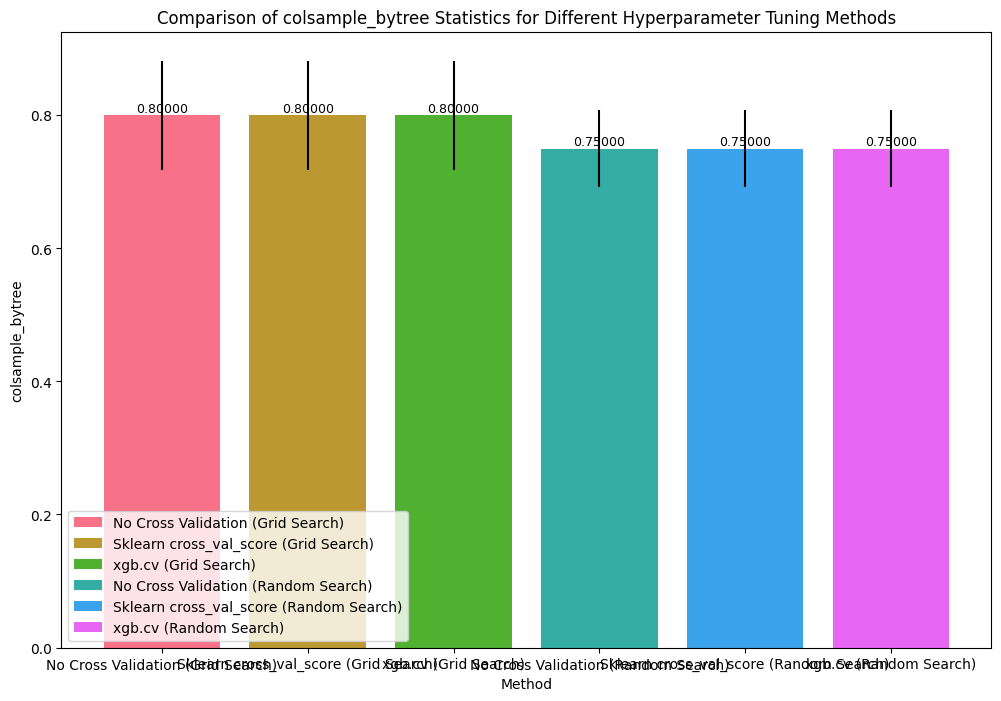

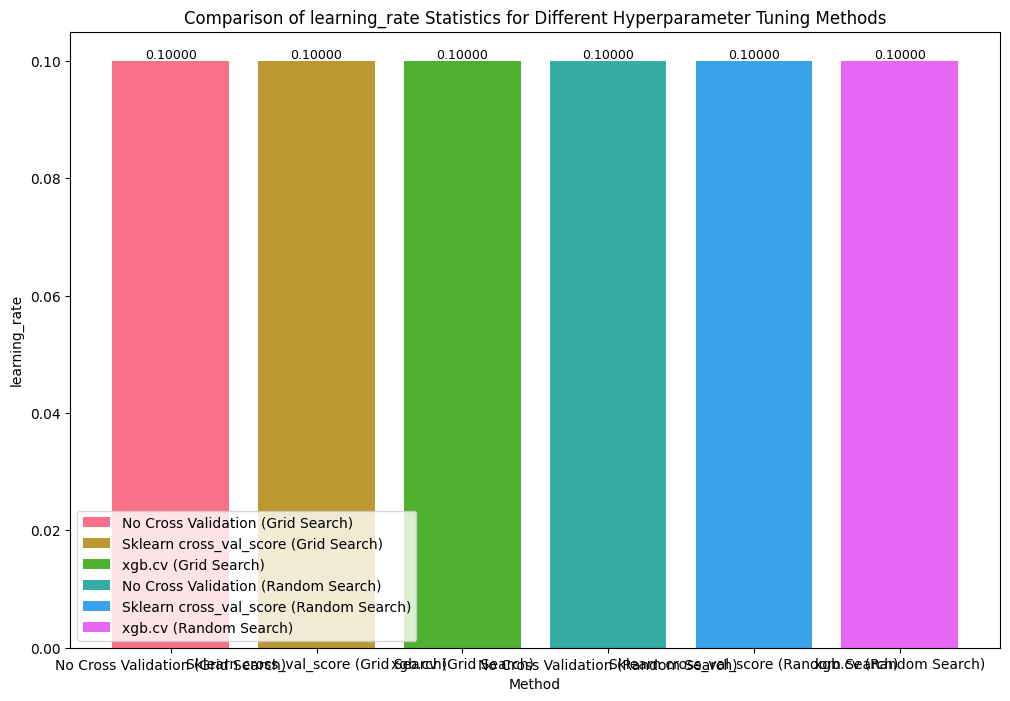

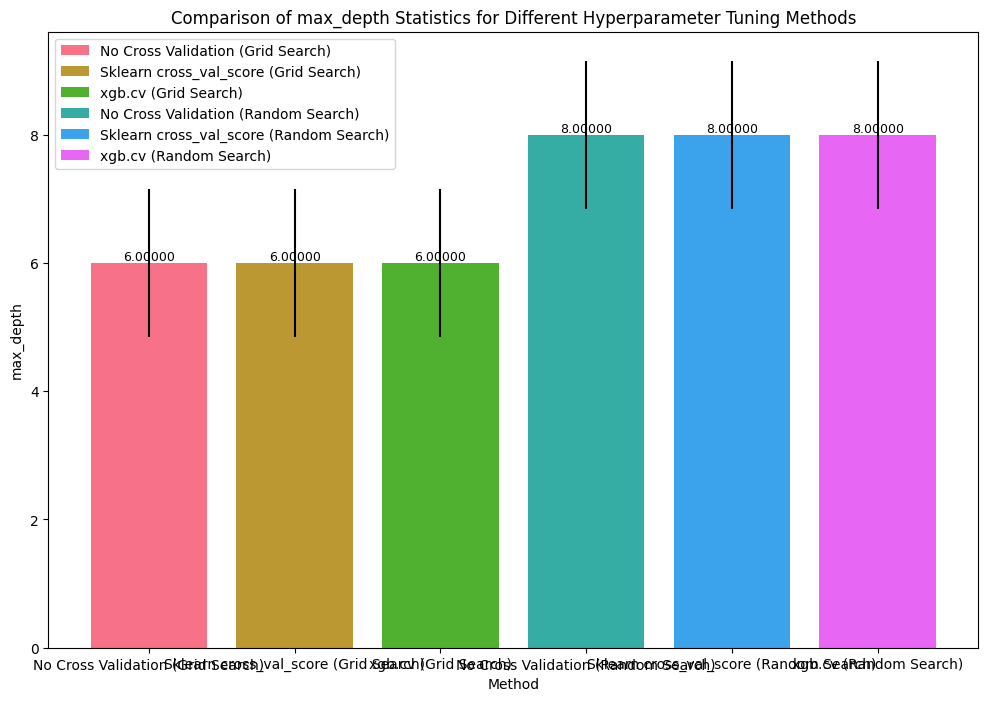

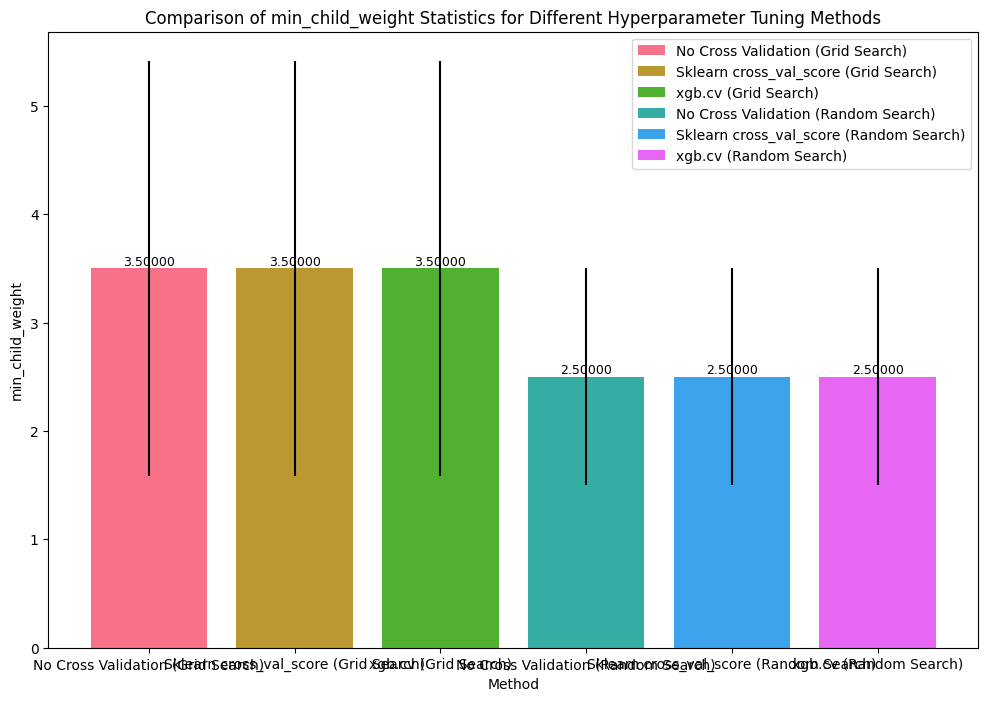

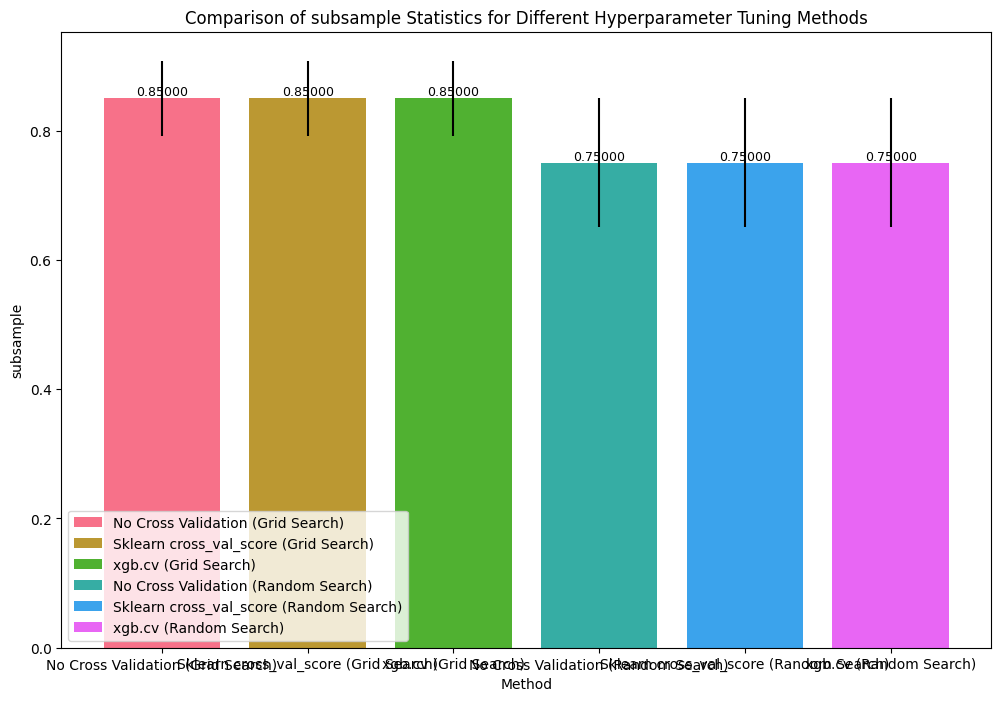

In [12]:
# Combine the results into a single DataFrame
combined_results = pd.concat([grid_search_results, random_search_results], ignore_index=True)

# Display the combined DataFrame
# import ace_tools as tools; tools.display_dataframe_to_user(name="Combined Hyperparameter Tuning Results", dataframe=combined_results)

# Compute statistics for performance metrics
metric_statistics = combined_results.groupby('Method')[['MAE', 'MSE', 'RMSE', 'R2']].agg(['mean', 'std'])
metric_statistics.columns = ['_'.join(col).strip() for col in metric_statistics.columns.values]

# Display the metric statistics DataFrame
# tools.display_dataframe_to_user(name="Metric Statistics", dataframe=metric_statistics)

# Visualize performance metrics statistics
metrics = ['MAE', 'MSE', 'RMSE', 'R2']
methods = combined_results['Method'].unique()
colors = sns.color_palette('husl', len(methods))

for metric in metrics:
    plt.figure(figsize=(12, 8))
    for i, method in enumerate(methods):
        mean_val = metric_statistics.loc[method, f'{metric}_mean']
        std_val = metric_statistics.loc[method, f'{metric}_std']
        plt.bar(i, mean_val, yerr=std_val, label=method, color=colors[i % len(colors)])
        plt.text(i, mean_val, f'{mean_val:.5f}', ha='center', va='bottom', fontsize=9)

    plt.xlabel('Method')
    plt.ylabel(metric)
    plt.title(f'Comparison of {metric} Statistics for Different Hyperparameter Tuning Methods')
    plt.xticks(range(len(methods)), methods)
    plt.legend()
    plt.show()

# Process best parameters
best_params_df = combined_results[['Test Size', 'Method', 'Best Params']]

# Convert Best Params from string to dictionary for better visualization
best_params_df['Best Params'] = best_params_df['Best Params'].apply(eval)

# Extract unique parameters
param_keys = set()
for params in best_params_df['Best Params']:
    param_keys.update(params.keys())

param_keys = sorted(param_keys)

# Create a DataFrame for best parameters
best_params_expanded = best_params_df['Best Params'].apply(pd.Series)
best_params_expanded['Test Size'] = best_params_df['Test Size']
best_params_expanded['Method'] = best_params_df['Method']

# Compute statistics for best parameters
param_statistics = best_params_expanded.groupby('Method')[param_keys].agg(['mean', 'std'])
param_statistics.columns = ['_'.join(col).strip() for col in param_statistics.columns.values]

# Display the parameter statistics DataFrame
# tools.display_dataframe_to_user(name="Parameter Statistics", dataframe=param_statistics)

# Plotting best parameters statistics
for param in param_keys:
    plt.figure(figsize=(12, 8))
    for i, method in enumerate(methods):
        mean_val = param_statistics.loc[method, f'{param}_mean']
        std_val = param_statistics.loc[method, f'{param}_std']
        plt.bar(i, mean_val, yerr=std_val, label=method, color=colors[i % len(colors)])
        plt.text(i, mean_val, f'{mean_val:.5f}', ha='center', va='bottom', fontsize=9)

    plt.xlabel('Method')
    plt.ylabel(param)
    plt.title(f'Comparison of {param} Statistics for Different Hyperparameter Tuning Methods')
    plt.xticks(range(len(methods)), methods)
    plt.legend()
    plt.show()


In [15]:
# Compute statistics for performance metrics
metric_statistics = combined_results.groupby('Method')[['MAE', 'MSE', 'RMSE', 'R2']].agg(['mean', 'std']).reset_index()
metric_statistics.columns = [' '.join(col).strip() for col in metric_statistics.columns.values]
metric_statistics

,Method,MAE mean,MAE std,MSE mean,MSE std,RMSE mean,RMSE std,R2 mean,R2 std
0,No Cross Validation (Grid Search),1.728356,0.054483,6.354617,0.216744,2.520562,0.042955,0.628084,0.026445
1,No Cross Validation (Random Search),1.704901,0.040256,6.255827,0.184130,2.500964,0.036650,0.633682,0.028478
2,Sklearn cross_val_score (Grid Search),2.521524,0.035441,11.714285,0.271540,3.393413,0.039694,0.310325,0.016005
3,Sklearn cross_val_score (Random Search),2.583187,0.031272,11.990922,0.075179,3.428755,0.011791,0.296169,0.005436
4,xgb.cv (Grid Search),1.731829,0.019565,6.157529,0.117068,2.481353,0.023566,0.647614,0.006700
5,xgb.cv (Random Search),1.700714,0.023497,6.012858,0.114862,2.452029,0.023400,0.655893,0.006573


In [16]:
# Extract and format the best parameters
best_params_df = combined_results[['Test Size', 'Method', 'Best Params']]
best_params_df['Best Params'] = best_params_df['Best Params'].apply(eval)

best_params_df

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23980\1969788851.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_params_df['Best Params'] = best_params_df['Best Params'].apply(eval)


,Test Size,Method,Best Params
0,0.20,No Cross Validation (Grid Search),"{'colsample_bytree': 0.7, 'learning_rate': 0.1..."
1,0.20,Sklearn cross_val_score (Grid Search),"{'colsample_bytree': 0.7, 'learning_rate': 0.1..."
2,0.20,xgb.cv (Grid Search),"{'colsample_bytree': 0.7, 'learning_rate': 0.1..."
3,0.25,No Cross Validation (Grid Search),"{'colsample_bytree': 0.8, 'learning_rate': 0.1..."
4,0.25,Sklearn cross_val_score (Grid Search),"{'colsample_bytree': 0.8, 'learning_rate': 0.1..."
5,0.25,xgb.cv (Grid Search),"{'colsample_bytree': 0.8, 'learning_rate': 0.1..."
6,0.30,No Cross Validation (Grid Search),"{'colsample_bytree': 0.8, 'learning_rate': 0.1..."
7,0.30,Sklearn cross_val_score (Grid Search),"{'colsample_bytree': 0.8, 'learning_rate': 0.1..."
8,0.30,xgb.cv (Grid Search),"{'colsample_bytree': 0.8, 'learning_rate': 0.1..."
9,0.35,No Cross Validation (Grid Search),"{'colsample_bytree': 0.9, 'learning_rate': 0.1..."


In [17]:

# Extract unique parameters
param_keys = set()
for params in best_params_df['Best Params']:
    param_keys.update(params.keys())

param_keys = sorted(param_keys)
param_keys

['colsample_bytree',
 'learning_rate',
 'max_depth',
 'min_child_weight',
 'subsample']

In [18]:
# Create a DataFrame for best parameters
best_params_expanded = best_params_df['Best Params'].apply(pd.Series)
best_params_expanded['Test Size'] = best_params_df['Test Size']
best_params_expanded['Method'] = best_params_df['Method']
best_params_expanded

,colsample_bytree,learning_rate,max_depth,min_child_weight,subsample,Test Size,Method
0,0.7,0.1,7.0,5.0,0.9,0.20,No Cross Validation (Grid Search)
1,0.7,0.1,7.0,5.0,0.9,0.20,Sklearn cross_val_score (Grid Search)
2,0.7,0.1,7.0,5.0,0.9,0.20,xgb.cv (Grid Search)
3,0.8,0.1,5.0,1.0,0.9,0.25,No Cross Validation (Grid Search)
4,0.8,0.1,5.0,1.0,0.9,0.25,Sklearn cross_val_score (Grid Search)
5,0.8,0.1,5.0,1.0,0.9,0.25,xgb.cv (Grid Search)
6,0.8,0.1,7.0,5.0,0.8,0.30,No Cross Validation (Grid Search)
7,0.8,0.1,7.0,5.0,0.8,0.30,Sklearn cross_val_score (Grid Search)
8,0.8,0.1,7.0,5.0,0.8,0.30,xgb.cv (Grid Search)
9,0.9,0.1,5.0,3.0,0.8,0.35,No Cross Validation (Grid Search)


In [19]:

# Compute statistics for best parameters
param_statistics = best_params_expanded.groupby('Method')[param_keys].agg(['mean', 'std']).reset_index()
param_statistics.columns = [' '.join(col).strip() for col in param_statistics.columns.values]
param_statistics

,Method,colsample_bytree mean,colsample_bytree std,learning_rate mean,learning_rate std,max_depth mean,max_depth std,min_child_weight mean,min_child_weight std,subsample mean,subsample std
0,No Cross Validation (Grid Search),0.80,0.081650,0.1,0.0,6.0,1.154701,3.5,1.914854,0.85,0.057735
1,No Cross Validation (Random Search),0.75,0.057735,0.1,0.0,8.0,1.154701,2.5,1.000000,0.75,0.100000
2,Sklearn cross_val_score (Grid Search),0.80,0.081650,0.1,0.0,6.0,1.154701,3.5,1.914854,0.85,0.057735
3,Sklearn cross_val_score (Random Search),0.75,0.057735,0.1,0.0,8.0,1.154701,2.5,1.000000,0.75,0.100000
4,xgb.cv (Grid Search),0.80,0.081650,0.1,0.0,6.0,1.154701,3.5,1.914854,0.85,0.057735
5,xgb.cv (Random Search),0.75,0.057735,0.1,0.0,8.0,1.154701,2.5,1.000000,0.75,0.100000


In [20]:

# Select the best evaluation metrics
best_evaluation = combined_results.groupby('Method').apply(lambda x: x.loc[x['R2'].idxmax()]).reset_index(drop=True)
best_evaluation


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23980\4119548243.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best_evaluation = combined_results.groupby('Method').apply(lambda x: x.loc[x['R2'].idxmax()]).reset_index(drop=True)


,Test Size,Method,Best Params,Start Time,End Time,Duration (s),MAE,MSE,RMSE,R2
0,0.20,No Cross Validation (Grid Search),"{'colsample_bytree': 0.7, 'learning_rate': 0.1...",2024-06-02 21:50:26,2024-06-02 21:52:14,107.924785,1.729272,6.241339,2.498267,0.654950
1,0.20,No Cross Validation (Random Search),"{'subsample': 0.8, 'min_child_weight': 4, 'max...",2024-06-02 22:10:53,2024-06-02 22:12:47,114.730431,1.650670,6.091417,2.468080,0.663238
2,0.25,Sklearn cross_val_score (Grid Search),"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",2024-06-02 21:52:25,2024-06-02 21:53:53,88.109255,2.470158,11.365345,3.339848,0.332870
3,0.30,Sklearn cross_val_score (Random Search),"{'subsample': 0.8, 'min_child_weight': 2, 'max...",2024-06-02 22:16:10,2024-06-02 22:17:49,99.210008,2.556400,11.929338,3.419392,0.300164
4,0.20,xgb.cv (Grid Search),"{'colsample_bytree': 0.7, 'learning_rate': 0.1...",2024-06-02 21:50:26,2024-06-02 21:52:14,107.924785,1.711477,6.024727,2.454532,0.655214
5,0.20,xgb.cv (Random Search),"{'subsample': 0.8, 'min_child_weight': 4, 'max...",2024-06-02 22:10:53,2024-06-02 22:12:47,114.730431,1.675666,5.880531,2.424981,0.663466
